## Метрики качества классификации

Продолжим изучать бинарную классификацию.

В этом уроке мы поговорим про оценку качкства уже обученой модели.

Пусть все также есть два класса, обозначим их метками $0$ и $1$. 

Имеются истинные метки $y \in$ {0,1} и предсказания в виде вероятностей первого класса.

Допустим мы знаем некоторый порог $p_0$, преодалев который мы ставим метку $1$, иначе $0$.

В предыдущих уроках мы мерили ошибку классификации, как *долю неправильных ответов*.

Чаще при оценке качества классификации смотрят наоборот: *долю правильных ответов* - **accuracy**

\begin{equation*}
accuracy = \dfrac{1}{N}\sum_{i=1}^N[\tilde y_i = y_i]
\end{equation*}

\begin{cases}
[True] = 1, \\
[False] = 0.
\end{cases}

* $y_i$ - истинная метка на $i$-ом объекте
* $\tilde y_i$ - предсказанная метка на $i$-ом объекте

По результатам классификации полезно составить следующую таблицу:

| predict/true  | y_true = 1         |y_true=0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | True Positive (TP)|False Positive (FP)|
| **y_pred = 0**  | False Negative (FN)|True Negative (TN)|

* True Positive (TP) - кол-во верно предсказанных объектов 1-го класса
* False Positive (FP) -  кол-во НЕверно предсказанных объектов 1-го класса
* True Negative (TN) - кол-во верно предсказанных объектов 0-го класса
* False Negative (FN) - кол-во НЕверно предсказанных объектов 0-го класса

Тогда метрику *accuracy* можно выразить, как:

\begin{equation*}
accuracy = \dfrac{TP + TN}{TP+TN+FN+FP} = \dfrac{n_{correct}}{N}
\end{equation*}

$n_{correct}$ - количество правильно предсказанных объектов

$N$ - количество объектов в выборке

### Пример:

Возьмем модель машинного обучения $f(x)$, обучим ее и получим следующие результаты на валидации:

| predict/true  | y_true = 1          |y_true = 0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | 15 |18  |
| **y_pred = 0**  | 80   |1000  |

\begin{equation*}
accuracy = \dfrac{15 + 1000}{15+1000+80+18} \approx 0.912
\end{equation*}

Точность выше 90%, кажется что неплохо.

Возьмем другую, совершенно простую модель машинного обучения $a(x)$, которая каждому объекту $x$ ставит метку $0$:

* $a(x) = 0$, для $\forall x \in X$

| predict/true  | y_true = 1          |y_true = 0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | 0 |0  |
| **y_pred = 0**  | 95   |1018  |

Понятно, что такая модель сама по себе очень плоха, но давайте посмотрим долю правильных ответов:
\begin{equation*}
accuracy = \dfrac{0 + 1018}{0+1018+95+0} \approx 0.915
\end{equation*}

Что мы имеем:
* Константный классификатор выдал точность классификации даже лучше, чем обученая модель!

* Оказалось выгоднее всем объектам ставить метку $0$, чем использовать обученый классификатор $f(x)$. Это случилось потомучто объектов нулевого класса оказалось гораздо больше, чем объектов первого класса.

* Выборка в которой объектов одного класса гораздо больше, чем объектов других классов, называется **несбалансированной**.

* $Accuracy$ на несблансированных выборках полезно сравнивать с $accuracy$ полученной при ответах константного классификатора.

На практике очень часто встречаются несбалансированные выборки, поэтому полезно смотреть на саму таблицу ошибок.

Такую таблицу можно строить и для большего числа классов, ее еще называют **confusion matrix**.

| predict/true  | y_true = 1         |y_true=0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | True Positive (TP)|False Positive (FP)|
| **y_pred = 0**  | False Negative (FN)|True Negative (TN)|

Мы выяснили, что метрика $accuracy$ не подходит для несблансированных данных.

Чаще всего помиомо $accuracy$ смотрят метрики устойчивые к *дисбалансу классов*:

\begin{equation*}
precision = \dfrac{TP}{TP+FP} \\
recall = \dfrac{TP}{TP+FN}
\end{equation*}

* $precisin$ (*точность*) $-$ доля правильно классифицированных объектов 1-го класса среди всех кого модель отнесла к 1-му классу.
* $recall$ (*полнота*) $-$ доля правильно классифицированных объектов 1-го среди всех объектов первого класса.


![](Precisionrecall.png?raw=true)

Давайте посмотрим на $precisin$ и $recall$ для нашего примера

| predict/true  | y_true = 1          |y_true = 0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | 15 |18  |
| **y_pred = 0**  | 80   |1000  |


\begin{equation*}
precision = \dfrac{15}{15+18} \approx 0.45 \\
recall = \dfrac{15}{15+80} \approx 0.158 \\
accuracy = \dfrac{15 + 1000}{15+1000+80+18} \approx 0.912 \\
\end{equation*}

Хоть доля правильных ответов $accuracy$ и выше $90\%$, $precision$ и $recall$ оказались очеень низкими, обе метрики ниже $50\%$, это очень плохо.

По таким метрикам видно, что $f(x)$ не самый лучший классификатор.

Мы находим всего $16 \%$ объектов первого класса ($recall = 0.158$), при этом почти в половине случае ошибаемся ($precision = 0.45$).


Если классифкатор выдает вероятности принадлежности к классу, то подбирая разные пороги $p_0$, мы можем отдавать предпочтения либо *точности (precision)* либо *полноте (recall)*

<details>
<summary>Раскрыть для подробностей</summary>
<p>

* Действительно, чем ниже порог $p_0$, тем чаще классификатор будет относить объект к 1-му классу. Увеличится $recall$, но и тогда станет больше ложно положительных срабатываний (False Positive), $precision$ упадет.
* И наоборот, увеличивая порог $p_0$, мы будем реже относить объекты к первому классу, будем более внимательны, False Positive станет меньше , $precision$ увеличится. Но тогда и истинных объектов 1-го класса мы станем находить меньше, $recall$ упадет

Мы смотрим метрики $precision$ и $recall$ для класса $1$, можно точно также их построить и для класса $0$ поменяв местами метки класса.

Но обычно этого не требуется, так как за класс $1$ обычно обозначается целевой класс, например: поиск мошенников среди всех клиентов. Нам интересно, как хоршо мы находим мошенников, а не лояльных абонентов. 

Как правило в задачах с несбалансированными выборками, меньший класс обозначается меткой 1, так как его труднее искать.

</p>
</details> 

Иногда бывает не очень удобно смотреть сразу на 2 метрики $precision$ и $recall$, удобнее смотреть на одну.

В этом случае мы могли бы взять среднее значение, но тогда становятся неразличимы следующие ситуации:

**Ex1:**
\begin{equation*}
precision = 0.95 \\
recall = 0.15 \\
среднее = 0.55
\end{equation*}
**Ex2:**
\begin{equation*}
precision = 0.55 \\
recall = 0.55 \\
среднее = 0.55
\end{equation*}

Совершенно разные ситуации, а среднее одинаковое.

Чтобы такого избежать, вместо среднего используют **F-меру** (среднее гармоническое):

\begin{equation*}
F = \dfrac{2 \cdot precision \cdot recall}{precision + recall}
\end{equation*}

**Ex1:**
\begin{equation*}
precision = 0.95 \\
recall = 0.15 \\
F = \dfrac{2 \cdot 0.95 \cdot 0.15}{0.95 + 0.15} \approx 0.26
\end{equation*}
**Ex2:**
\begin{equation*}
precision = 0.55 \\
recall = 0.55 \\
F = \dfrac{2 \cdot 0.55 \cdot 0.55}{0.55 + 0.55} = 0.55
\end{equation*}

**F-меру** еще можно понимать, как сглаженный между точностью и полнотой:

*F-мера* близка к нулю, когда близка к нулю хотябы одна из двух метрик (*precision* или *recall*).


Все перечисленные метрики классификации требуют предсказаний в виде метки класса.

Значит для оценки качества предсказаний каждый раз необходимо подбирать пороги, что не всегда бывает удобно.

Хотелось бы уметь оценивать качество классификации по самим вероятностям вне зависимости от порога.

Рассмотрим двумерную плоскость. 

* по оси абсцисс будем откладывать долю неверно принятых объектов (False Positive Rate, FPR)

* по оси ординат - долю  верно принятых объектов (True Positive Rate, TPR, он же *recall*)

\begin{equation*}
FPR = \dfrac{FP}{FP+TN} \\
TPR = \dfrac{TP}{TP+FN}
\end{equation*}

Каждый выбор порога $p_0$ (всего их $N+1$, $N$-количество объектов в выборке) будет соотвествовать точке на такой плоскости с осями *FPR* и *TPR*, тогда меняя порог $p_0$ мы можем построить кривую, которая всегда будет выходить из точки (0,0) и приходить  в точку (1,1). А численной мерой качества будет площадь под такой кривой.

* Кривая построенная таким образом называется **ROC криваой**
* Площадь под *ROC криваой* называют **AUC ROC**

**Разберем процедуру построения *ROC криваой* на конкретном примере.**

Пусть алгоритм машинного обучения $f(x)$ выдал оценки вероятностей первого класса. Также у нас есть исстинные метки класса.


|y_pred| y_true|
|------| -----:|
|0.3 |1|        
|0.1 |0|
|0 |0|
|0.2 |1|
|0.2 |0|
|0.5 |0|
|0.7 |1|
|0.6 |1|
|0.15 |0|

1. Отсортируем таблицу по оценкам алгоритма $f(x)$:


|y_pred| y_true|
|------| -----:|
|0.7 |1|
|0.6 |1|
|0.5 |0|
|0.3 |1|   
|0.2 |1|
|0.2 |0|
|0.15 |0|
|0.1 |0|
|0 |0|

* Пусть $k_0$ - количество объектов класса $0$, $k_0=5$
* $k_1$ - количество объектов класса $1$, $k_1 = 4$

2. Разобьем единичный квадрат на $k_0$ вертикальных и $k_1$ горизонтальных частей.

In [12]:
from classification_helper import *
import numpy as np

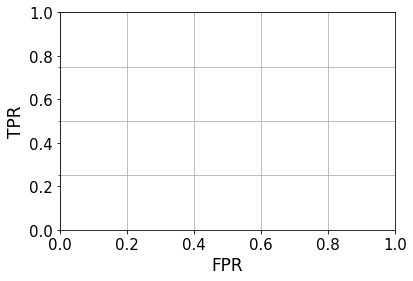

In [13]:
y_pred = [0.3,0.1,0,0.2,0.2,0.5,0.7,0.6,0.15]
y_true = [1,0,0,1,0,0,1,1,0]
k_0, k_1 = 5,4
plot_square(k_0,k_1)

3. Начинаем строить кривую, стартуем из точки $(0,0)$, 
4. Идем по отсортированной таблице сверху вниз: 
   * Если **y_true == 1**, то делаем шаг вверх
   * Если **y_true == 0**, то делаем шаг вправо
   * Если для некоторых объектов, вероятности $f(x)$ первого класса равны: делаем шаг вправо на количество объектов клааса $0$ и вверх на количество объектов класса $1$ (тоесть по диангонали)
5. Идем по таблице пока не дойдем до конца повторяя процедуру $4$
6. Когда пройдем всю таблицу, должны оказаться в точке $(1,1)$, так как сделали $k_1$ шагов вверх и  $k_0$ шагов вправо.

|y_pred| y_true|
|------| -----:|
|0.7 |1|
|0.6 |1|
|0.5 |0|
|0.3 |1|   
|0.2 |1|
|0.2 |0|
|0.15 |0|
|0.1 |0|
|0 |0|

In [14]:
def create_my_roc_curve(y_true, y_pred):
    
    y_true_pred = np.array([y_pred,y_true]).T #Объеденям предсказания и истиные метки в одну матрицу
    y_true_pred = y_true_pred[y_true_pred[:,0].argsort()][::-1] #сортировка по вероятностям
    
    
    y_pred_sorted = y_true_pred[:,0]
    y_true_sorted = y_true_pred[:,1]
    
    k_1 = y_true_sorted[y_true_sorted==1].shape[0]
    k_0 = y_true_sorted[y_true_sorted==0].shape[0]
    
    
    #Определяем величину шага по каждой из осей
    d_tpr = 1/k_1
    d_fpr = 1/k_0
    
    TPR, FPR = [0], [0]
    i = 0
    
    while i < y_true_pred.shape[0]:
        
        prob = y_pred_sorted[i]
        prob_next = prob
        step_tpr, step_fpr = 0, 0
        
        while prob == prob_next:
            if y_true_sorted[i] == 1:
                step_tpr += d_tpr
            else:
                step_fpr += d_fpr
                
            i += 1
            if i < y_true_pred.shape[0]:
                prob_next = y_pred_sorted[i]
            else:
                break
        
        TPR.append(TPR[-1] + step_tpr)
        FPR.append(FPR[-1] + step_fpr)
            
    return FPR, TPR


|y_pred| y_true|
|------| -----:|
|0.7 |1|
|0.6 |1|
|0.5 |0|
|0.3 |1|
|0.2 |1|
|0.2 |0|
|0.15 |0|
|0.1 |0|
|0 |0|

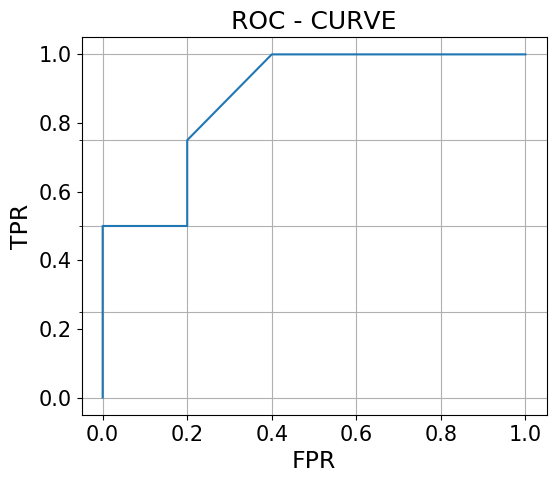

In [15]:
fpr,tpr = create_my_roc_curve(y_true, y_pred)
plot_roc_curve(fpr,tpr, k_0, k_1)

Свойства roc кривой:
* Чем точнее работает классификатор $f(x)$, тем ближе *roc кривая* будет находится к точке $(0,1)$.
* Если классификатор расставляет метки случайным образом, *roc кривая* будет похожа на диагональ.
* Если классификатор $f(x)$ работает хуже случайного расставления меток, тоест ставит противоположные метки классам, кривая пройдет ниже диагонали. В этом случае можно взять противоположные вероятности и классификатор будет рабоать лучше случайного

*Roc кривая* также есть в библиотеке *scikit-learn*

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

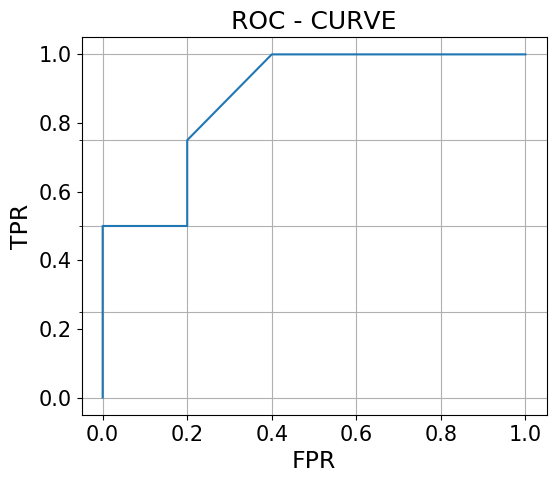

In [17]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
plot_roc_curve(fpr, tpr, k_0, k_1)

Численная характеристика - площадь под *roc кривой*: **roc auc**

In [18]:
#Принимает на вход точки кривой fpr и tpr
print("roc auc:", auc(fpr, tpr))

roc auc: 0.875


In [19]:
#Принимает на вход ответа классифкатора и истинные метки
print("roc auc:", roc_auc_score(y_true, y_pred))

roc auc: 0.875


Как и с *accuracy*, *roc auc* может быть завышеным в случае большого дисбаланса классов. В этом случае можно построть кривую в координатах $precisin, recall$ - **precision recall curve**. Численной характеристикой также будет площадь под *PR кривой* : **PR AUC**

In [20]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)

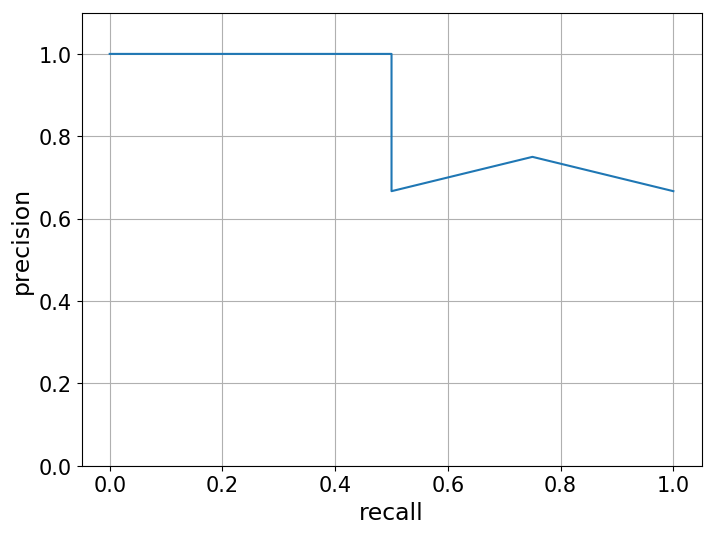

In [21]:
plot_pr_curve(recall,precision)

In [22]:
print("pr auc:", auc(recall,precision))

pr auc: 0.8541666666666666


### Вывод
1. Базовой метрикой классификации служит доля правильных ответов $accuracy$.
2. В случае несбалансированной выборки, $accuracy$ является плохой мерой качества, в таких случая смотрят 
   на метрики $precision$ и $recall$ (*точность* и *полнота*), или их гармоничесское среднее $F-меру$.

   
3. В случае, если классификатор выдает вероятности классов, можно настраивать порог $p_0$ в зависимости от требований к точности и полноте.
4. Если хотим померить качество классифкатора вне зависимости от порога $p_0$, можем построить *PR и ROC кривые*, а численной мерой качества будет площадь под кривой.